# 2019-07-23 Pancreas data for fig 3
# Bob's new curated cells, no prior annotation

In [1]:
import pandas as pd
import numpy as np
import loompy
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
import matplotlib as mpl
import imp
import sys

sys.path.append('/home/bojk/Data/minimeta_pyfiles/')
import semiAnnotate_main as sam
import semiAnnotate_Sankey as sank
import semiAnnotate_dotplot as sdot
import get_timestamp as time

In [36]:
# load data
# Bob Jones Tumor Pancreas dataset (to be annotated)
TuPa_count_path = '../leidenalg/Datasets/TuPaMetaDataDivya/CuratedTumorCountTable.csv'
TuPa_counttable = pd.read_csv(TuPa_count_path,index_col=0)
TuPa_meta = pd.read_csv('../leidenalg/Datasets/TuPaMetaDataDivya/CuratedTumorMetaData.csv',sep=',',index_col=0)
tsne_coords  = pd.read_csv('../leidenalg/Datasets/TuPaMetaDataDivya/CuratedTumorTSNECoordinates.csv',index_col=0)
TuPa_meta = TuPa_meta.join(tsne_coords)

# switch index from ENSG number to gene name 
translate = pd.read_csv('../leidenalg/Datasets/mart_export.txt',sep='\t')
lut = dict(zip(translate['Gene stable ID'],translate['Gene name']))
TuPa_counttable.rename(index=lut,columns=str,inplace=True)
#  Pancreas data (adult aging to be used as atlas)
AA_count_path = '../leidenalg/Datasets/AdultAgingPancForCIRM/AdultAgeingCountTable.csv'
AA_counttable = pd.read_csv(AA_count_path,index_col=0)
AA_meta = pd.read_csv('../leidenalg/Datasets/AdultAgingPancForCIRM/pancreas_adult_annotation_table.csv')
AA_meta['idx'] = 'X'+AA_meta['c1_chip_id'].astype(str)+'.'+AA_meta['capture_position']
AA_meta.set_index('idx',inplace=True)

AAtsne = pd.read_csv('../leidenalg/Datasets/AdultAgingPancForCIRM/AdultAgeingTSNETable.csv',sep=',')
AAtsne.set_index(AAtsne['Unnamed: 0'].str[1:],inplace=True)
AAtsne.index = 'X'+AAtsne.index
AAtsne.rename(index=str,columns={'Unnamed: 1': 'Dim1','Unnamed: 2':'Dim2'},inplace=True)
AA_meta = AA_meta.join(AAtsne[['Dim1','Dim2','celltypes']],how='inner')
AA_meta.dropna(how='all',axis=1,inplace=True)


TuPa_meta['celltypes'] = np.nan
#TuPa_meta.rename(index=str, columns={'annotation':'celltypes'},inplace=True) # this is when annotations are present

In [37]:
savedir = '../leidenalg/Datasets/Pancreas/'
print(len(AA_meta))
AA_meta.celltypes.value_counts()

2542


alpha          998
acinar         411
ductal         389
beta           347
unsure         262
delta           82
mesenchymal     53
Name: celltypes, dtype: int64

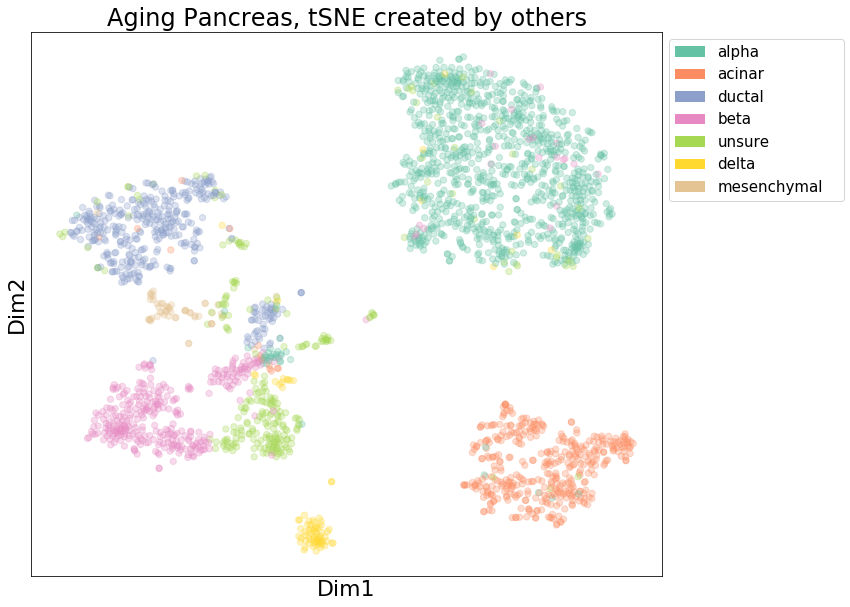

In [38]:
keys = list(AA_meta.celltypes.value_counts().index); values = sns.color_palette('Set2',len(keys))
lut = dict(zip(keys,values))
colors = AA_meta.celltypes.map(lut)

f = plt.figure(figsize=(12,10))
gs = gridspec.GridSpec(1,1)
ax = f.add_subplot(gs[0,0])
AA_meta.plot.scatter('Dim1','Dim2',ax=ax,color=colors,s=40,alpha=.3)#,label=colors.keys)
for x,y in lut.items():
    plt.bar(0,0,color=y,label=x,alpha=1)
    handles, labels = ax.get_legend_handles_labels()
    #plt.legend(handles[:],labels[:],bbox_to_anchor=(-0.0, 1.08, 1., .102), loc=2,
    plt.legend(handles[:],labels[:],bbox_to_anchor=(1, .9, .3, .102), loc=2,
               ncol=1, mode="expand",fontsize=15)
plt.yticks([]);plt.xticks([])
plt.title('Aging Pancreas, tSNE created by others')
plt.gcf().subplots_adjust(left=.05,right=0.78)
plt.show()
f.savefig(savedir+'Atlas_tSNE_cellTypes.png')

# removing 'unsure' cell class from data

In [39]:
AA_newmeta = AA_meta[AA_meta['celltypes']!='unsure'].copy()
len(AA_newmeta)

2280

# basic dataset characteristics

"f,ax = plt.subplots(figsize=(6,5))\nkeys = TuPa_meta['celltypes'].value_counts().index;values=sns.color_palette('Paired',len(keys))\nlut = dict(zip(keys,values))\ncolors = TuPa_meta['celltypes'].value_counts().index.map(lut)\nTuPa_meta['celltypes'].value_counts().plot.barh(width=.9,color=colors,ax=ax)\nplt.gca().invert_yaxis()\nplt.xlabel('number of cells')\nplt.title('New data')\nplt.gcf().subplots_adjust(left=.5,right=0.95,bottom=.2,top=.9)\nf.savefig(savedir+'New_data_original_cellNumBarh_curated.png')\nf.savefig(savedir+'New_data_original_cellNumBarh_curated.pdf')"

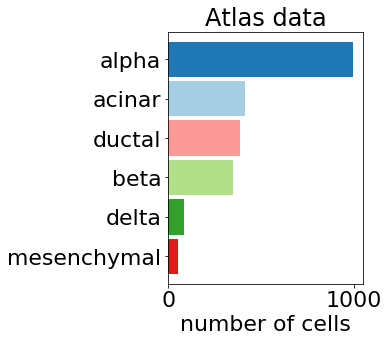

In [9]:
f,ax = plt.subplots(figsize=(6,5))
newlut = dict(zip(np.sort(AA_newmeta['celltypes'].unique()),sns.color_palette('Paired',len(AA_newmeta['celltypes'].unique()))))
colors = AA_newmeta['celltypes'].value_counts().index.map(newlut)
AA_newmeta['celltypes'].value_counts().plot.barh(width=.9,ax=ax,color=colors)
plt.gca().invert_yaxis()
plt.title('Atlas data')
plt.xlabel('number of cells')
plt.gcf().subplots_adjust(left=.5,right=0.95,bottom=.2,top=.9)
f.savefig(savedir+'Atlas_data_original_cellNumBarh.png')
f.savefig(savedir+'Atlas_data_original_cellNumBarh.pdf')

"""f,ax = plt.subplots(figsize=(6,5))
keys = TuPa_meta['celltypes'].value_counts().index;values=sns.color_palette('Paired',len(keys))
lut = dict(zip(keys,values))
colors = TuPa_meta['celltypes'].value_counts().index.map(lut)
TuPa_meta['celltypes'].value_counts().plot.barh(width=.9,color=colors,ax=ax)
plt.gca().invert_yaxis()
plt.xlabel('number of cells')
plt.title('New data')
plt.gcf().subplots_adjust(left=.5,right=0.95,bottom=.2,top=.9)
f.savefig(savedir+'New_data_original_cellNumBarh_curated.png')
f.savefig(savedir+'New_data_original_cellNumBarh_curated.pdf')"""

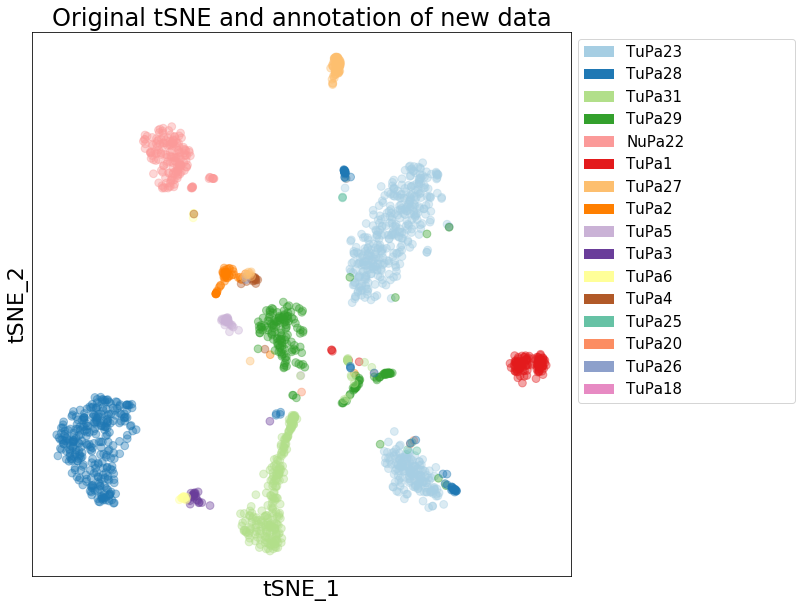

In [81]:
keys = TuPa_meta['Tumor'].value_counts().index;values=sns.color_palette('Paired',12)+sns.color_palette('Set2',len(keys)-12)
lut = dict(zip(keys,values))
colors = TuPa_meta['Tumor'].map(lut)

f,ax = plt.subplots(figsize=(11,10))
TuPa_meta.plot.scatter('tSNE_1','tSNE_2',c=colors,ax=ax,alpha=.4,s=60)

for x,y in lut.items():
    plt.bar(0,0,color=y,label=x,alpha=1)
    handles, labels = ax.get_legend_handles_labels()
    #plt.legend(handles[:],labels[:],bbox_to_anchor=(-0.0, 1.08, 1., .102), loc=2,
plt.legend(handles[:],labels[:],bbox_to_anchor=(1, .9, .43, .102), loc=2,
               ncol=1, mode="expand",fontsize=15)
plt.yticks([]);plt.xticks([])
plt.title('Original tSNE and annotation of new data')
plt.gcf().subplots_adjust(left=.05,right=0.73)
f.savefig(savedir+'tSNE_original_oldAnnotation_curatedData.png')
f.savefig(savedir+'tSNE_original_oldAnnotation_curatedData.pdf')

In [112]:
alpha = ['GCG','LOXL4','PLCE1','IRX2','GC','KLHL41','CRYBA2','TM4SF4','RGS4']
beta = ['INS','IAPP','MAFA','NPTX2','DLK1','ADCYAP1','PFKFB2','PDX1','TGFBR3','SYT13']
delta = ['SST','PRG4','LEPR','RBP4','BCHE','HHEX','FRZB','PCSK1','RGS2','GABRG2']
gamma = ['PPY']
epsilon = ['GHRL','ISL1']

acinar = ['PRSS1']
ductal = ['PROM1','KRT19','SPARC']
stellate = ['RGS5','PDGFRA','SPARC']
endo = ['VWF','SPARC'] 
panendothelial = ['PECAM1','CDH5','ESAM','FLT1','KDR']
mesenchymal = ['THY1']


pdac = ['LAMC2','CTSE','GPX2','LGALS4','GPRC5A','MMP14','ITGA2','AGR2','COL17A1','TSPAN8','CEACAM7']
ict = ['SCG2','RASSF7','TTR','SGNE1','INSM1','PCSK2','QPCT','FGB','PEX7','PTPRN2','SERPINA1','ARF3']
third_clust = ['AXIN2','AXL','MAFB','MMP2','BGN','COL1A2','FN1','SPARC']

force_include = set(alpha+beta+delta+gamma+epsilon+acinar+ductal+stellate+endo+panendothelial+mesenchymal)

KOLS = ['alpha','beta','delta','gamma','PDAC','acinar','islet cell tumors','third_cluster']

# set date here

In [120]:
date

'20190724135706'

In [85]:
date = time.datenum_complete()

/home/bojk/miniconda3/envs/py360/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log2
  # This is added back by InteractiveShellApp.init_path()


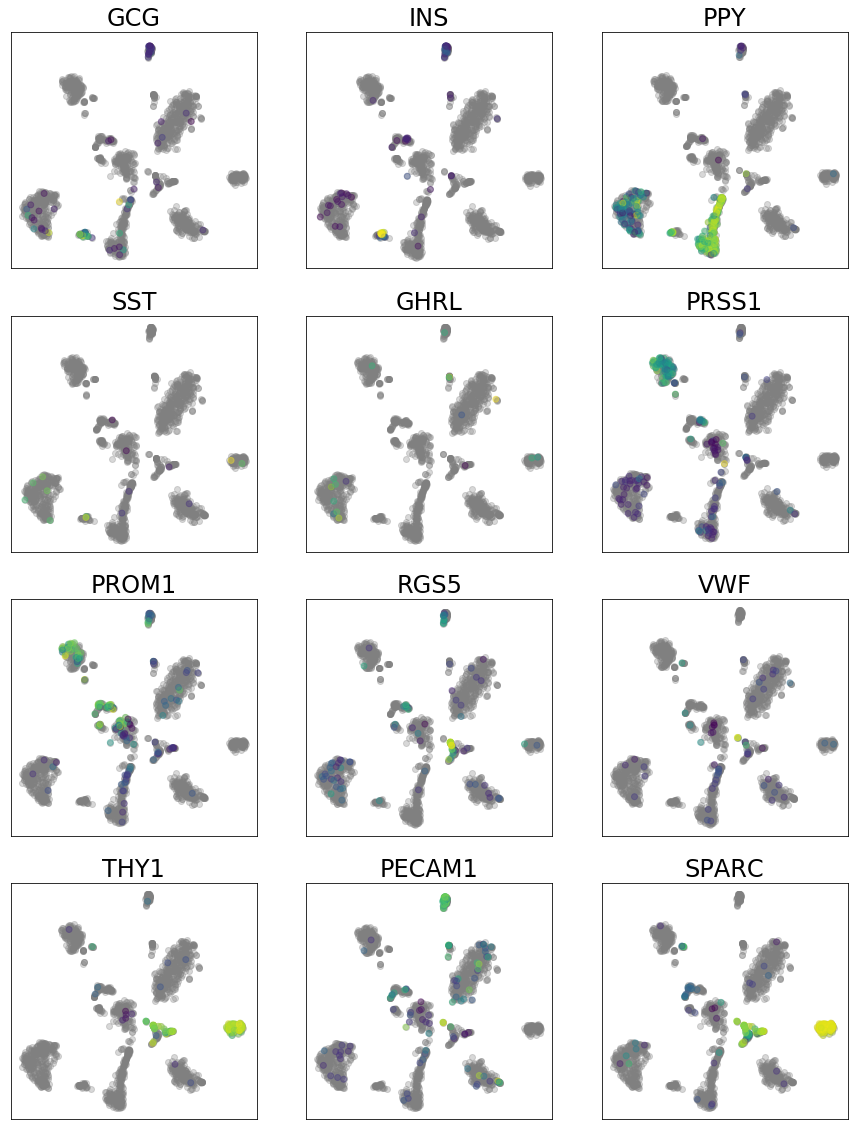

In [121]:
f,ax = plt.subplots(4,3,figsize=(15,20))
ax = ax.ravel()

types = ['alpha','beta','gamma','delta','epsilon','acinar','ductal','stellate','endo','mesenchymal']
key_markers = ['GCG','INS','PPY','SST','GHRL','PRSS1','PROM1','RGS5','VWF','THY1','PECAM1','SPARC']

for i in range(len(key_markers)):
    gene = key_markers[i]
    TuPa_meta[gene] = TuPa_counttable.loc[gene].divide(TuPa_meta['nReads'])
    ax[i].scatter(TuPa_meta['tSNE_1'],TuPa_meta['tSNE_2'],c='gray',alpha=.3)
    ax[i].scatter(TuPa_meta['tSNE_1'],TuPa_meta['tSNE_2'],cmap='viridis',alpha=.4,c=np.log2(TuPa_meta[gene]))
    ax[i].set_title(gene)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
f.savefig(savedir+date+'/key_pancreatic_marker_genes.png')
f.savefig(savedir+date+'/key_pancreatic_marker_genes.pdf')
#ax[-1].scatter(TuPa_meta['tSNE_1'],TuPa_meta['tSNE_2'],c='b',alpha=.6)
    



# no self-edging

In [159]:
imp.reload(sam)
atlasgenes = 40
atlasweights = 60

keys = ['cell type column','number of features cell type','number of features new data'
        ,'weights_atlas_cells','timestamp','savedir']
values = ['celltypes',atlasgenes,600,atlasweights,date,savedir]
kwds = dict(zip(keys,values))
matrix,weights, AA_newmeta,TuPa_meta = sam.normmerge_twoCounttables(AA_counttable,
                                                                             AA_newmeta, TuPa_counttable, TuPa_meta, **kwds)
matrix_feature_selected = sam.feature_select(matrix.dropna(how='all',axis=1),AA_newmeta,**kwds)

kwds['threshold_neigborhood'] = thresn = .7  
kwds['n_pcs'] = n_pcs = 20 
kwds['resolution_parameter'] = respar = .002 
kwds['self_edging'] = False

tsnedf, class_numbers,vals,wdm = sam.semiAnnotate_to_pca_to_tsnedf(matrix_feature_selected,weights,AA_newmeta,TuPa_meta,**kwds)

-------------------------------------------
genes to be removed from counttable:
['BIVM-ERCC5', 'ERCC-00002', 'ERCC-00003', 'ERCC-00004', 'ERCC-00009', 'ERCC-00012', 'ERCC-00013', 'ERCC-00014', 'ERCC-00016', 'ERCC-00017', 'ERCC-00019', 'ERCC-00022', 'ERCC-00024', 'ERCC-00025', 'ERCC-00028', 'ERCC-00031', 'ERCC-00033', 'ERCC-00034', 'ERCC-00035', 'ERCC-00039', 'ERCC-00040', 'ERCC-00041', 'ERCC-00042', 'ERCC-00043', 'ERCC-00044', 'ERCC-00046', 'ERCC-00048', 'ERCC-00051', 'ERCC-00053', 'ERCC-00054', 'ERCC-00057', 'ERCC-00058', 'ERCC-00059', 'ERCC-00060', 'ERCC-00061', 'ERCC-00062', 'ERCC-00067', 'ERCC-00069', 'ERCC-00071', 'ERCC-00073', 'ERCC-00074', 'ERCC-00075', 'ERCC-00076', 'ERCC-00077', 'ERCC-00078', 'ERCC-00079', 'ERCC-00081', 'ERCC-00083', 'ERCC-00084', 'ERCC-00085', 'ERCC-00086', 'ERCC-00092', 'ERCC-00095', 'ERCC-00096', 'ERCC-00097', 'ERCC-00098', 'ERCC-00099', 'ERCC-00104', 'ERCC-00108', 'ERCC-00109', 'ERCC-00111', 'ERCC-00112', 'ERCC-00113', 'ERCC-00116', 'ERCC-00117', 'ERCC-00

-------------------------------------------
Cell types in atlas:
['acinar' 'alpha' 'beta' 'delta' 'ductal' 'mesenchymal']
-------------------------------------------
Cell types in new data:
[nan]
-------------------------------------------
-------------------------------------------
Selected number of genes from atlas:
240
-------------------------------------------
Selected number of genes from new cells:
600
-------------------------------------------
Combined total of selected genes:
791
-------------------------------------------
-------------------------------------------
perfoming weighted PCA
-------------------------------------------
perfoming tSNE
assigned default perplexity of 20
tSNE done.
-------------------------------------------
-------------------------------------------
perfoming UNweighted PCA
-------------------------------------------
perfoming tSNE
tSNE done.
-------------------------------------------


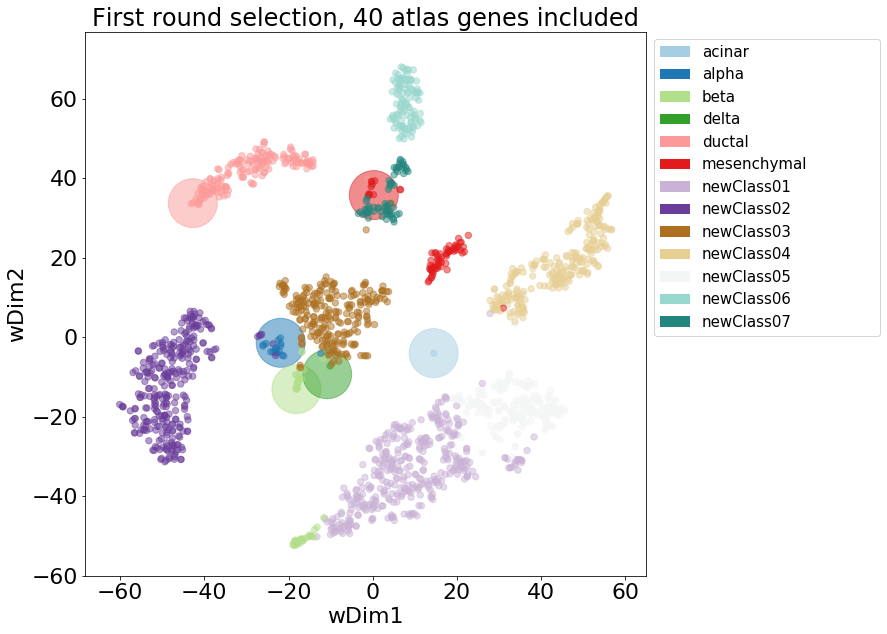

In [163]:
values = sns.color_palette('Paired', 10)[:6]+sns.color_palette('Paired',12)[8:10]+sns.color_palette('BrBG',len(class_numbers)-8)
newlut = dict(zip(class_numbers,values))
newcolor = tsnedf['class'].map(newlut)

f,ax = plt.subplots(figsize=(12,10))
tsnedf.plot.scatter('wDim1','wDim2',s=weights*40
                    ,alpha=.5,color=newcolor,ax=ax)
for x,y in newlut.items():
    plt.bar(0,0,color=y,label=x,alpha=1)
    handles, labels = ax.get_legend_handles_labels()
    #plt.legend(handles[:],labels[:],bbox_to_anchor=(-0.0, 1.08, 1., .102), loc=2,
plt.legend(handles,vals,bbox_to_anchor=(1, .9, .43, .102), loc=2,
               ncol=1, mode="expand",fontsize=15)
plt.title('First round selection, '+str(atlasgenes)+' atlas genes included')
plt.xlim(right=65)
plt.ylim(bottom=-60)
plt.gcf().subplots_adjust(left=.1,right=0.75)
f.savefig(savedir+date+'/semiAnnotate_nofetal_noselfEdges_equalweight_tSNE_'+date+'_nPCs='+str(n_pcs)+'_thresNeigh='+str(thresn)+'_respar='+str(respar)+'.png')
f.savefig(savedir+date+'/semiAnnotate_nofetal_noselfEdges_equalweight_tSNE_'+date+'_nPCs='+str(n_pcs)+'_thresNeigh='+str(thresn)+'_respar='+str(respar)+'.pdf')

In [164]:
force_include.difference(set(matrix_feature_selected.index))

{'BCHE',
 'CDH5',
 'ESAM',
 'FLT1',
 'FRZB',
 'GABRG2',
 'HHEX',
 'IRX2',
 'ISL1',
 'KDR',
 'KLHL41',
 'NPTX2',
 'PCSK1',
 'PDX1',
 'PECAM1',
 'PFKFB2',
 'RGS4',
 'SYT13',
 'TGFBR3',
 'TM4SF4'}

/home/bojk/miniconda3/envs/py360/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log2
  # This is added back by InteractiveShellApp.init_path()


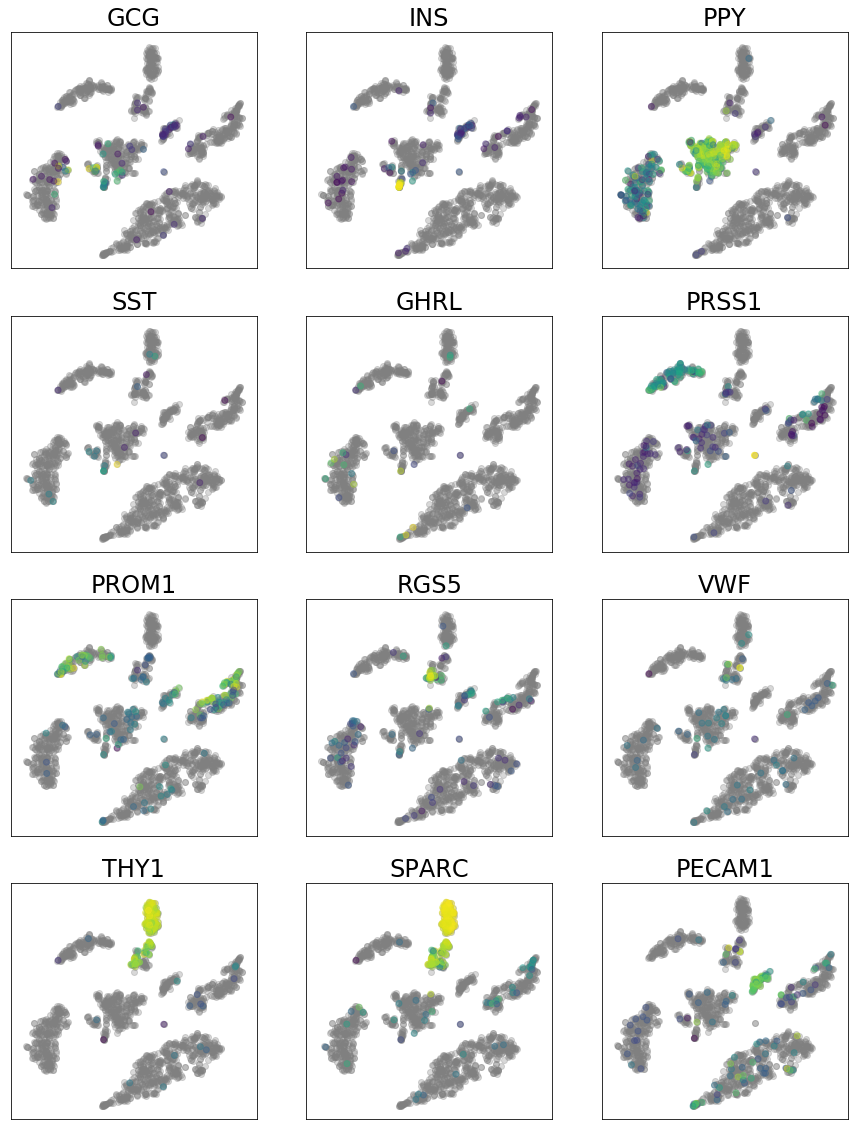

In [165]:
f,ax = plt.subplots(4,3,figsize=(15,20))
ax = ax.ravel()

types = ['alpha','beta','gamma','delta','epsilon','acinar','ductal','stellate','endo','mesenchymal']
key_markers = ['GCG','INS','PPY','SST','GHRL','PRSS1','PROM1','RGS5','VWF','THY1','SPARC','PECAM1']

for i in range(len(key_markers)):
    gene = key_markers[i]
    #TuPa_meta[gene] = TuPa_counttable.loc[gene].divide(TuPa_meta['nReads'])
    ax[i].scatter(tsnedf['wDim1'],tsnedf['wDim2'],c='gray',alpha=.3)
    ax[i].scatter(tsnedf['wDim1'],tsnedf['wDim2'],cmap='viridis',alpha=.4,c=np.log2(matrix.loc[gene]))
    ax[i].set_title(gene)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_xlim(right=65)
    ax[i].set_ylim(bottom=-60)
    
f.savefig(savedir+date+'/key_pancreatic_marker_genes_tsnedf.png')
f.savefig(savedir+date+'/key_pancreatic_marker_genes_tsnedf.pdf')

In [20]:
"""idx = tsnedf[6:].index
TuPa_meta.loc[idx,'new_membership'] = tsnedf.iloc[6:]['new_membership']
# new results mapped onto old tSNE
newlut = dict(zip(vals,sns.color_palette('Paired', 10)[:6]+sns.color_palette('Paired', 10)[8:10]+sns.color_palette('BrBG',len(vals)-8)))
newcolor = TuPa_meta['new_membership'].map(newlut)

f,ax = plt.subplots(figsize=(12,10))
TuPa_meta.plot.scatter('tSNE_1','tSNE_2',s=60
                    ,alpha=.5,color=newcolor,ax=ax)
for x,y in newlut.items():
    plt.bar(0,0,color=y,label=x,alpha=1)
    handles, labels = ax.get_legend_handles_labels()
    #plt.legend(handles[:],labels[:],bbox_to_anchor=(-0.0, 1.08, 1., .102), loc=2,
plt.legend(handles,labels,bbox_to_anchor=(1, .9, .43, .102), loc=2,
               ncol=1, mode="expand",fontsize=15)
plt.title('First round selection, '+str(atlasgenes)+' atlas genes included')
plt.gcf().subplots_adjust(left=.1,right=0.75)
f.savefig(savedir+date+'/semiAnnotate_noselfEdges_equalweight_origtSNE_'+date+'_nPCs='+str(n_pcs)+'_thresNeigh='+str(thresn)+'_respar='+str(respar)+'.png')
f.savefig(savedir+date+'/semiAnnotate_noselfEdges_equalweight_origtSNE_'+date+'_nPCs='+str(n_pcs)+'_thresNeigh='+str(thresn)+'_respar='+str(respar)+'.pdf')"""

'idx = tsnedf[6:].index\nTuPa_meta.loc[idx,\'new_membership\'] = tsnedf.iloc[6:][\'new_membership\']\n# new results mapped onto old tSNE\nnewlut = dict(zip(vals,sns.color_palette(\'Paired\', 10)[:6]+sns.color_palette(\'Paired\', 10)[8:10]+sns.color_palette(\'BrBG\',len(vals)-8)))\nnewcolor = TuPa_meta[\'new_membership\'].map(newlut)\n\nf,ax = plt.subplots(figsize=(12,10))\nTuPa_meta.plot.scatter(\'tSNE_1\',\'tSNE_2\',s=60\n                    ,alpha=.5,color=newcolor,ax=ax)\nfor x,y in newlut.items():\n    plt.bar(0,0,color=y,label=x,alpha=1)\n    handles, labels = ax.get_legend_handles_labels()\n    #plt.legend(handles[:],labels[:],bbox_to_anchor=(-0.0, 1.08, 1., .102), loc=2,\nplt.legend(handles,labels,bbox_to_anchor=(1, .9, .43, .102), loc=2,\n               ncol=1, mode="expand",fontsize=15)\nplt.title(\'First round selection, \'+str(atlasgenes)+\' atlas genes included\')\nplt.gcf().subplots_adjust(left=.1,right=0.75)\nf.savefig(savedir+date+\'/semiAnnotate_noselfEdges_equalweight_

# with self-edging

In [189]:
#imp.reload(li)
#imp.reload(semiannotate)
kwds['self_edging'] = True
kwds['resolution_parameter'] = respar = .0029
tsnedfSE, class_numbersSE,valsSE,wdmSE = sam.semiAnnotate_to_pca_to_tsnedf(matrix_feature_selected,weights,AA_newmeta,TuPa_meta,**kwds)   

-------------------------------------------
perfoming weighted PCA
-------------------------------------------
perfoming tSNE
assigned default perplexity of 20
tSNE done.
-------------------------------------------
-------------------------------------------
perfoming UNweighted PCA
-------------------------------------------
perfoming tSNE
tSNE done.
-------------------------------------------


In [190]:
tsnedfSE['new_membership'].value_counts()
#tsnedfSE['original_membership'].value_counts()

newClass01     302
newClass02     244
newClass03     234
newClass04     218
newClass05     168
ductal         163
newClass06     138
newClass07     106
mesenchymal     77
newClass08      67
newClass09      26
beta            20
newClass10      18
alpha           17
newClass11      11
acinar           2
delta            2
Name: new_membership, dtype: int64

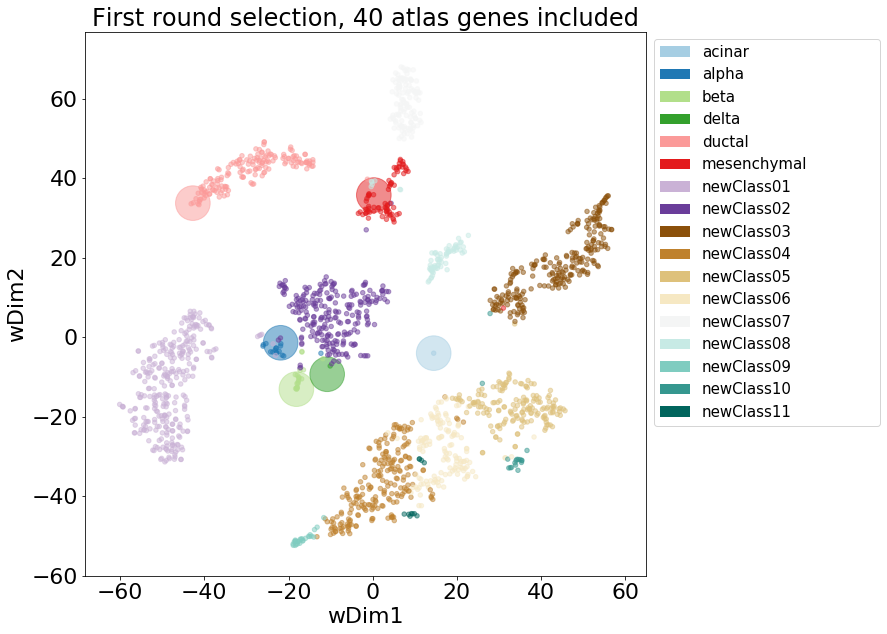

In [191]:
values = sns.color_palette('Paired', 10)[:6]+sns.color_palette('Paired',12)[8:10]+sns.color_palette('BrBG',len(class_numbersSE)-8)
newlut = dict(zip(class_numbersSE,values))
newcolor = tsnedfSE['class'].map(newlut)

f,ax = plt.subplots(figsize=(12,10))
tsnedfSE.plot.scatter('wDim1','wDim2',s=weights*20
                    ,alpha=.5,color=newcolor,ax=ax)
for x,y in newlut.items():
    plt.bar(0,0,color=y,label=x,alpha=1)
    handles, labels = ax.get_legend_handles_labels()
    #plt.legend(handles[:],labels[:],bbox_to_anchor=(-0.0, 1.08, 1., .102), loc=2,
plt.legend(handles,valsSE,bbox_to_anchor=(1, .9, .43, .102), loc=2,
               ncol=1, mode="expand",fontsize=15)
plt.title('First round selection, '+str(atlasgenes)+' atlas genes included')
plt.gcf().subplots_adjust(left=.1,right=0.75)
plt.ylim(bottom=-60)
plt.xlim(right=65)
f.savefig(savedir+date+'/semiAnnotateSE_selfEdges_weightsEq_tSNE_'+date+'_nPCs='+str(n_pcs)+'_thresNeigh='+str(thresn)+'_respar='+str(respar)+'.png')
f.savefig(savedir+date+'/semiAnnotateSE_selfEdges_weightsEq_tSNE_'+date+'_nPCs='+str(n_pcs)+'_thresNeigh='+str(thresn)+'_respar='+str(respar)+'.pdf')

In [17]:
"""idx = tsnedf[6:].index
TuPa_meta.loc[idx,'new_membershipSE'] = tsnedfSE.iloc[6:]['new_membership']
# new results mapped onto old tSNE
newlut = dict(zip(valsSE,sns.color_palette('Paired', 10)[:6]+sns.color_palette('Paired',12)[8:10]+sns.color_palette('BrBG',len(valsSE)-6)))
newcolor = TuPa_meta['new_membershipSE'].map(newlut)

f,ax = plt.subplots(figsize=(12,10))
TuPa_meta.plot.scatter('tSNE_1','tSNE_2',s=60
                    ,alpha=.5,color=newcolor,ax=ax)
for x,y in newlut.items():
    plt.bar(0,0,color=y,label=x,alpha=1)
    handles, labels = ax.get_legend_handles_labels()
    #plt.legend(handles[:],labels[:],bbox_to_anchor=(-0.0, 1.08, 1., .102), loc=2,
plt.legend(handles,labels,bbox_to_anchor=(1, .9, .43, .102), loc=2,
               ncol=1, mode="expand",fontsize=15)
plt.title('First round selection, '+str(atlasgenes)+' atlas genes included')
plt.gcf().subplots_adjust(left=.1,right=0.75)
f.savefig(savedir+date+'/semiAnnotate_selfEdges_equalweight_origtSNE_'+date+'_nPCs='+str(n_pcs)+'_thresNeigh='+str(thresn)+'_respar='+str(respar)+'.png')
f.savefig(savedir+date+'/semiAnnotate_selfEdges_equalweight_origtSNE_'+date+'_nPCs='+str(n_pcs)+'_thresNeigh='+str(thresn)+'_respar='+str(respar)+'.pdf')"""

'idx = tsnedf[6:].index\nTuPa_meta.loc[idx,\'new_membershipSE\'] = tsnedfSE.iloc[6:][\'new_membership\']\n# new results mapped onto old tSNE\nnewlut = dict(zip(valsSE,sns.color_palette(\'Paired\', 10)[:6]+sns.color_palette(\'Paired\',12)[8:10]+sns.color_palette(\'BrBG\',len(valsSE)-6)))\nnewcolor = TuPa_meta[\'new_membershipSE\'].map(newlut)\n\nf,ax = plt.subplots(figsize=(12,10))\nTuPa_meta.plot.scatter(\'tSNE_1\',\'tSNE_2\',s=60\n                    ,alpha=.5,color=newcolor,ax=ax)\nfor x,y in newlut.items():\n    plt.bar(0,0,color=y,label=x,alpha=1)\n    handles, labels = ax.get_legend_handles_labels()\n    #plt.legend(handles[:],labels[:],bbox_to_anchor=(-0.0, 1.08, 1., .102), loc=2,\nplt.legend(handles,labels,bbox_to_anchor=(1, .9, .43, .102), loc=2,\n               ncol=1, mode="expand",fontsize=15)\nplt.title(\'First round selection, \'+str(atlasgenes)+\' atlas genes included\')\nplt.gcf().subplots_adjust(left=.1,right=0.75)\nf.savefig(savedir+date+\'/semiAnnotate_selfEdges_equal

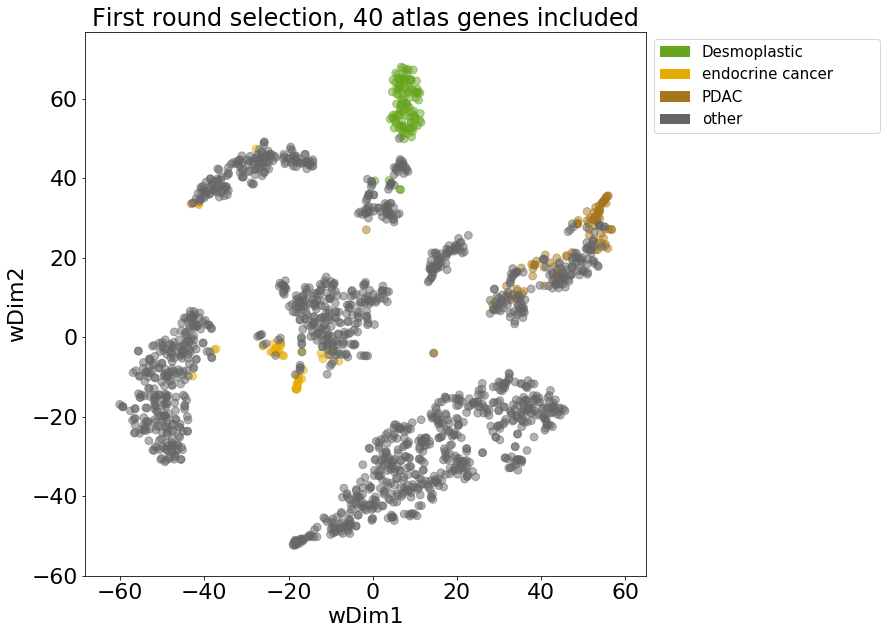

In [170]:
keys = ['TuPa3','TuPa6','TuPa2','TuPa4','TuPa5','TuPa1']
values = ['endocrine cancer','endocrine cancer','PDAC','PDAC','PDAC','Desmoplastic']
lut = dict(zip(keys,values))
TuPa_meta['tumTypes'] = TuPa_meta['Tumor'].map(lut)


newlut = dict(zip(list(TuPa_meta['tumTypes'].fillna('other').unique()),sns.color_palette('Dark2', 8)[4:]))
newcolor = TuPa_meta['tumTypes'].fillna('other').map(newlut)

"""f,ax = plt.subplots(figsize=(12,10))
TuPa_meta.plot.scatter('tSNE_1','tSNE_2',s=60
                    ,alpha=.5,color=newcolor,ax=ax)
for x,y in newlut.items():
    plt.bar(0,0,color=y,label=x,alpha=1)
    handles, labels = ax.get_legend_handles_labels()
    #plt.legend(handles[:],labels[:],bbox_to_anchor=(-0.0, 1.08, 1., .102), loc=2,
plt.legend(handles,labels,bbox_to_anchor=(1, .9, .43, .102), loc=2,
               ncol=1, mode="expand",fontsize=15)
plt.title('First round selection, '+str(atlasgenes)+' atlas genes included')
plt.gcf().subplots_adjust(left=.1,right=0.75)
f.savefig(savedir+date+'/known_tumorTypes_oldtSNE.pdf')
"""

temp = tsnedf.join(TuPa_meta.tumTypes)
#values = sns.color_palette('Paired', 10)[:6]+sns.color_palette('Paired',12)[8:10]+sns.color_palette('BrBG',len(class_numbers)-8)
#newlut = dict(zip(class_numbers,values))
#newcolor = tsnedf['class'].map(newlut)
#newlut = dict(zip(list(temp['tumTypes'].fillna('other').unique()),sns.color_palette('Dark2', 4)))
newcolor = temp['tumTypes'].fillna('other').map(newlut)
f,ax = plt.subplots(figsize=(12,10))
temp.plot.scatter('wDim1','wDim2',s=60
                    ,alpha=.5,color=newcolor,ax=ax)
for x,y in newlut.items():
    plt.bar(0,0,color=y,label=x,alpha=1)
    handles, labels = ax.get_legend_handles_labels()
    #plt.legend(handles[:],labels[:],bbox_to_anchor=(-0.0, 1.08, 1., .102), loc=2,
plt.legend(handles,labels,bbox_to_anchor=(1, .9, .43, .102), loc=2,
               ncol=1, mode="expand",fontsize=15)
plt.title('First round selection, '+str(atlasgenes)+' atlas genes included')
plt.gcf().subplots_adjust(left=.1,right=0.75)
plt.ylim(bottom=-60)
plt.xlim(right=65)
f.savefig(savedir+date+'/known_tumorTypes_newtSNE.pdf')

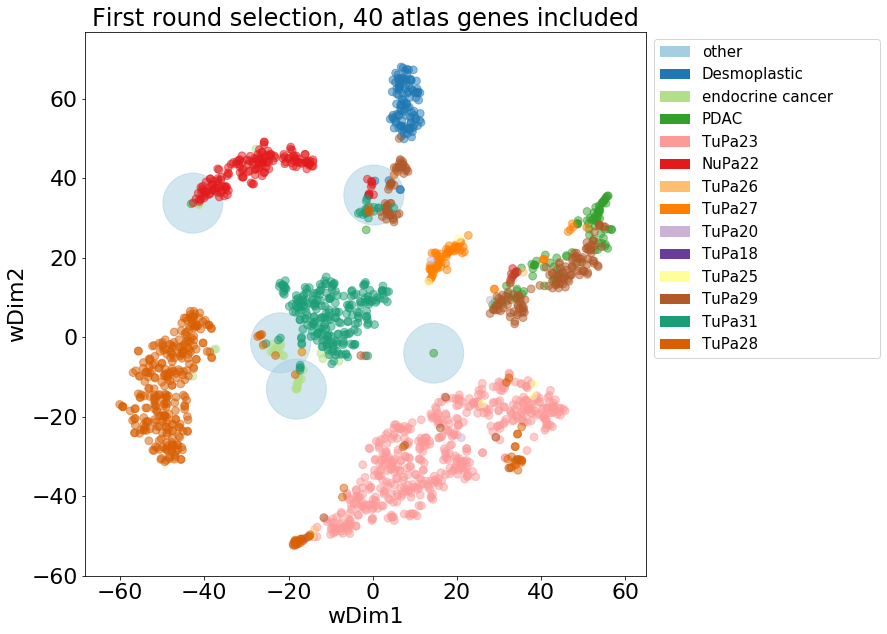

In [171]:
temp = tsnedf.join(TuPa_meta.Tumor)
temp = temp[temp['new_membership']!='delta']
temp['new'] = temp['Tumor']
temp['new'] = [lut[f] if f in lut.keys() else f for f in temp['Tumor']]
#values = sns.color_palette('Paired', 10)[:6]+sns.color_palette('Paired',12)[8:10]+sns.color_palette('BrBG',len(class_numbers)-8)
#newlut = dict(zip(class_numbers,values))
#newcolor = tsnedf['class'].map(newlut)
kois = temp['new'].fillna('other').unique()
newlut = dict(zip(kois,sns.color_palette('Paired', len(kois)-2)+sns.color_palette('Dark2',2)))
newcolor = temp['new'].fillna('other').map(newlut)
f,ax = plt.subplots(figsize=(12,10))
temp.plot.scatter('wDim1','wDim2',s=weights[1:]*60
                    ,alpha=.5,color=newcolor,ax=ax)
for x,y in newlut.items():
    plt.bar(0,0,color=y,label=x,alpha=1)
    handles, labels = ax.get_legend_handles_labels()
    #plt.legend(handles[:],labels[:],bbox_to_anchor=(-0.0, 1.08, 1., .102), loc=2,
plt.legend(handles,labels,bbox_to_anchor=(1, .9, .43, .102), loc=2,
               ncol=1, mode="expand",fontsize=15)
plt.ylim(bottom=-60)
plt.xlim(right=65)
plt.title('First round selection, '+str(atlasgenes)+' atlas genes included')
plt.gcf().subplots_adjust(left=.1,right=0.75)
f.savefig(savedir+date+'/tumorPatients_withmerged_newtsne_noDelta.pdf')

# check stability - this re-initializes semiAnnotate(!)

In [198]:
# uses same dict as above

dim = len(matrix_feature_selected.T)
trials = 20
b = c = np.ndarray([trials,dim,dim],np.int32)

ts = tsnedfSE.copy()
for i in range(trials):
    #values = ['Cell_type',30,500,.8,20,respar[i],True]
    
    #ts, class_numSE,valSE,wdmSE= li.semiAnnotate_to_pca_to_tsnedf(matrix_feature_selected,weights,BA_newmeta,GBM_meta,**kwds)
    ts, class_numSE,valSE = sam.semiAnnotate_using_tsnedf(matrix_feature_selected,weights,AA_newmeta,TuPa_meta,ts,**kwds)
    newdf2 = ts.copy()
    newdf2['class2'] = newdf2['class']+1
    df = pd.pivot_table(newdf2,values='class2',index=newdf2.index,columns='new_membership',aggfunc=np.count_nonzero).fillna(0).copy()                     
    a = df.T.corr().values
    b[i][:][:] = a
    #c[i][:][:] = np.corrcoef(a)

    
average_df = pd.DataFrame(np.average(b,axis=0),index=df.index,columns=df.index)
#average_corr = pd.DataFrame(np.average(c,axis=0),index=df.index,columns=df.index)
drop_idx = average_df[(average_df[average_df==1].sum()==1)].index
stable_pairs = average_df.drop(drop_idx).drop(drop_idx,axis=1)
stablep = stable_pairs[stable_pairs==1].fillna(0)

# select groups with same size as value counts (this avoids me having to perform hierarchical clustering)
idx = stablep.sum().value_counts().index.astype(int)
val = stablep.sum().value_counts().values
df = pd.DataFrame(index=range(len(idx)), columns=['idx','val'])
df['idx'] = idx;df['val'] = val
groups = df[df.eq(df.iloc[:, 0], axis=0).all(1)==True].idx.values

idxs = []
for cluster in groups:
    idxs.append(list(stablep[stablep.sum()==cluster].index))
clusterdict = dict(zip(groups,idxs))

21


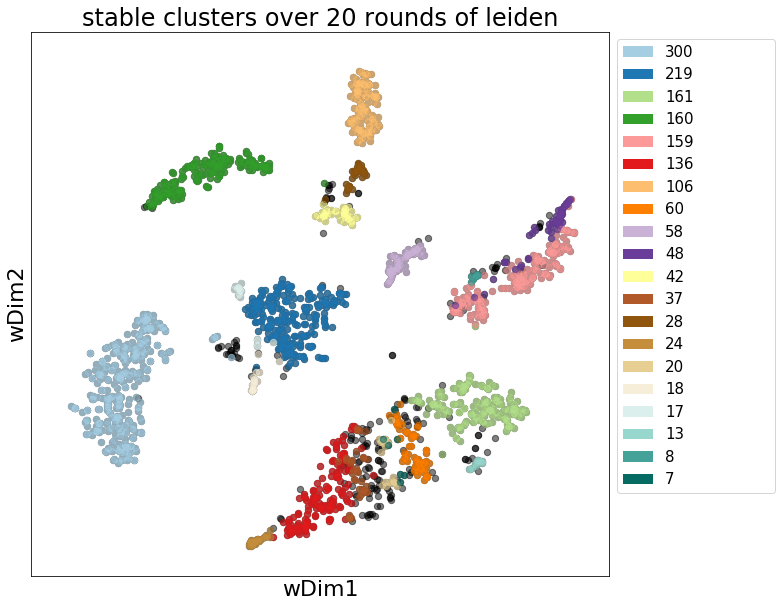

In [199]:
print(len(groups))
numgr = 20
groupi = groups[:numgr] # take the 11 largest groups


if numgr<=12:
    values = sns.color_palette('Paired',len(groupi))
else:
    values = sns.color_palette('Paired',12)+sns.color_palette('BrBG',numgr-12)
lut = dict(zip(groupi,values))

f,ax = plt.subplots(figsize=(11,10))

tsnedfSE.plot.scatter('wDim1','wDim2',ax=ax,color='k',s=2*20,alpha=.5)
for group in groupi:
    idxes = clusterdict[group]
    tsnedfSE.loc[idxes].plot.scatter('wDim1','wDim2',ax=ax,color=lut[group],s=40,alpha=.6)

for x,y in lut.items():
    plt.bar(0,0,color=y,label=x,alpha=1)
    handles, labels = ax.get_legend_handles_labels()
    #plt.legend(handles[:],labels[:],bbox_to_anchor=(-0.0, 1.08, 1., .102), loc=2,
    plt.legend(handles[:],labels[:],bbox_to_anchor=(1, .9, .3, .102), loc=2,
               ncol=1, mode="expand",fontsize=15)
plt.yticks([]);plt.xticks([])
plt.title('stable clusters over '+str(trials)+' rounds of leiden')
plt.gcf().subplots_adjust(left=.05,right=0.78)
plt.ylim(bottom=-60)
plt.xlim(right=65)
plt.show()
f.savefig(savedir+date+'/semiAnnotateStability_'+str(numgr)+'largestGroups'+date+'.png')
f.savefig(savedir+date+'/semiAnnotateStability_'+str(numgr)+'largestGroups'+date+'.pdf')

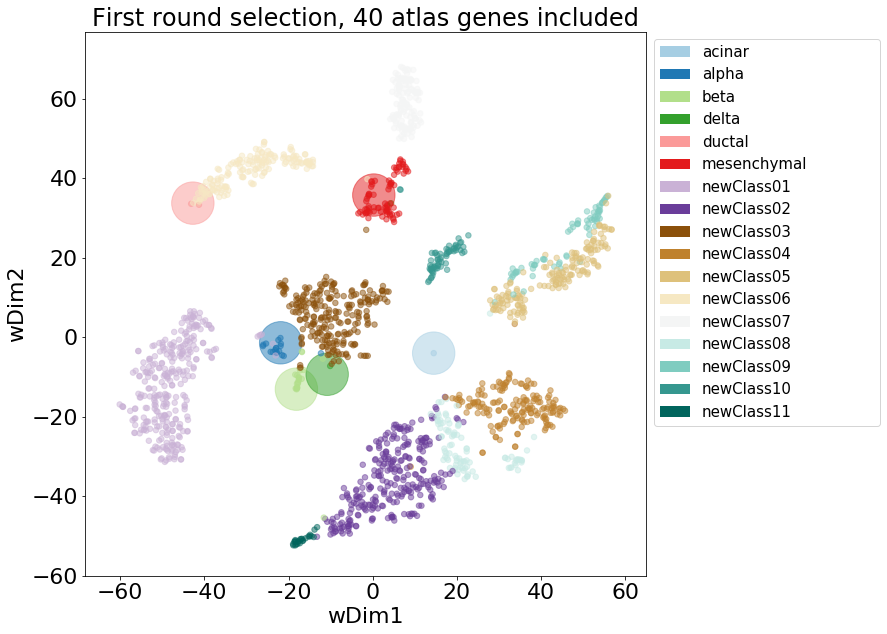

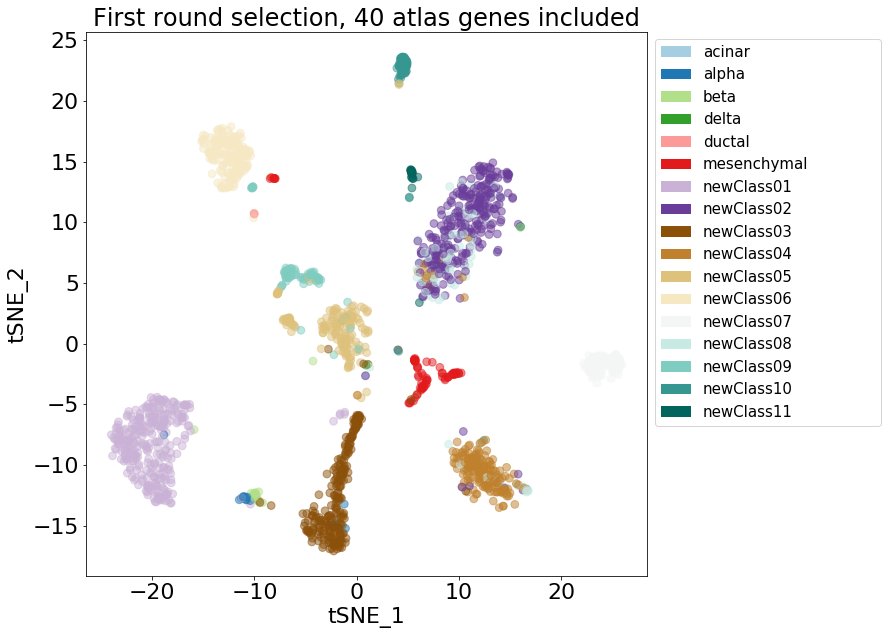

In [201]:
#post stability classes
values = sns.color_palette('Paired', 10)[:6]+sns.color_palette('Paired', 11)[8:10]+sns.color_palette('BrBG',len(valSE)-8)
newlut = dict(zip(valSE,values))
newcolor = ts['new_membership'].map(newlut)

f,ax = plt.subplots(figsize=(12,10))
ts.plot.scatter('wDim1','wDim2',s=weights*30
                    ,alpha=.5,color=newcolor,ax=ax)
for x,y in newlut.items():
    plt.bar(0,0,color=y,label=x,alpha=1)
    handles, labels = ax.get_legend_handles_labels()
    #plt.legend(handles[:],labels[:],bbox_to_anchor=(-0.0, 1.08, 1., .102), loc=2,
plt.legend(handles,valSE,bbox_to_anchor=(1, .9, .43, .102), loc=2,
               ncol=1, mode="expand",fontsize=15)
plt.ylim(bottom=-60)
plt.xlim(right=65)
plt.title('First round selection, '+str(atlasgenes)+' atlas genes included')
plt.gcf().subplots_adjust(left=.1,right=0.75)
f.savefig(savedir+date+'/semiAnnotateSE_selfEdges_tSNE_'+date+'_nPCs='+str(n_pcs)+'_thresNeigh='+str(thresn)+'_respar='+str(respar)+'_postStab.png')
f.savefig(savedir+date+'/semiAnnotateSE_selfEdges_tSNE_'+date+'_nPCs='+str(n_pcs)+'_thresNeigh='+str(thresn)+'_respar='+str(respar)+'_postStab.pdf')

idx = tsnedf[6:].index
TuPa_meta.loc[idx,'new_membershipSE_postStab'] = ts.iloc[6:]['new_membership']
# new results mapped onto old tSNE
newlut = dict(zip(valSE,sns.color_palette('Paired', 10)[:6]+sns.color_palette('Paired',12)[8:10]+sns.color_palette('BrBG',len(valSE)-8)))
newcolor = TuPa_meta['new_membershipSE_postStab'].map(newlut)

f,ax = plt.subplots(figsize=(12,10))
TuPa_meta.plot.scatter('tSNE_1','tSNE_2',s=60
                    ,alpha=.5,color=newcolor,ax=ax)
for x,y in newlut.items():
    plt.bar(0,0,color=y,label=x,alpha=1)
    handles, labels = ax.get_legend_handles_labels()
    #plt.legend(handles[:],labels[:],bbox_to_anchor=(-0.0, 1.08, 1., .102), loc=2,
plt.legend(handles,labels,bbox_to_anchor=(1, .9, .43, .102), loc=2,
               ncol=1, mode="expand",fontsize=15)
plt.title('First round selection, '+str(atlasgenes)+' atlas genes included')
plt.gcf().subplots_adjust(left=.1,right=0.75)

f.savefig(savedir+date+'/semiAnnotate_selfEdges_origtSNE_'+date+'_nPCs='+str(n_pcs)+'_thresNeigh='+str(thresn)+'_respar='+str(respar)+'_postStab.png')
f.savefig(savedir+date+'/semiAnnotate_selfEdges_origtSNE_'+date+'_nPCs='+str(n_pcs)+'_thresNeigh='+str(thresn)+'_respar='+str(respar)+'_postStab.pdf')

In [202]:
matrix_feature_selected.to_csv(savedir+date+'/feature_selected_matrix_'+date+'.csv')
TuPa_meta.to_csv(savedir+date+'/new_cells_metadata_'+date+'.csv')
tsnedf.to_csv(savedir+date+'/tsnedf_noselfEdging_'+date+'.csv')
tsnedfSE.to_csv(savedir+date+'/tsnedf_selfEdging_'+date+'.csv')
ts.to_csv(savedir+date+'/tsnedf_selfEdging_postStab_'+date+'.csv')

In [88]:
cluster_pair_df = sam.make_pairdf(1-average_df,2,ts)

---------------------------------------
Making list of edges with -100% correlation and up
Max 2 edges per cell.
Found 1298 edges.
---------------------------------------


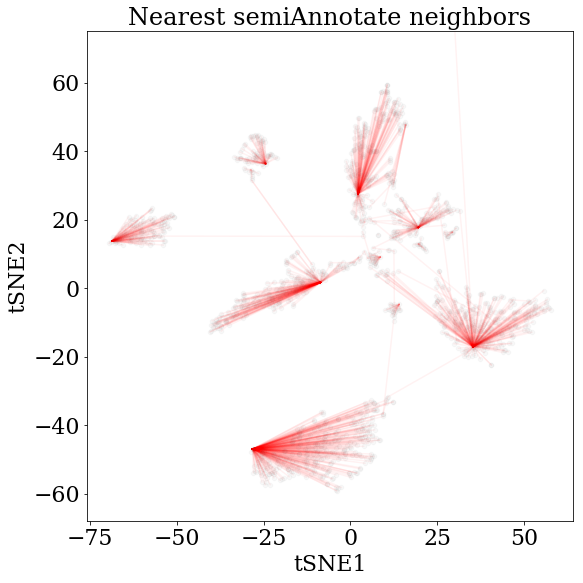

In [183]:
cluster_pair_df#.correlation.sort_values()
#pairs_wSE_95 = li.make_pairs(pd.DataFrame(wdmSE),.05,5)
#olors = sns.color_palette('RdBu_r',5)
f,ax = plt.subplots(figsize=(10,10))
ts.plot.scatter('wDim1','wDim2',figsize=(10,10),ax=ax,alpha=.05,color='gray')
for pair in cluster_pair_df.index:
    xy1 = ts.loc[cluster_pair_df.loc[pair,0]][['wDim1','wDim2']]
    xy2 = ts.loc[cluster_pair_df.loc[pair,1]][['wDim1','wDim2']]
    #corr = pairdf.loc[pair,'correlation']
    ax.plot([xy1[0],xy2[0]],[xy1[1],xy2[1]],alpha=.05
            ,c='r')

#plt.yticks([]);plt.xticks([])
plt.xlabel('tSNE1'),plt.ylabel('tSNE2')
plt.title('Nearest semiAnnotate neighbors')

plt.gcf().subplots_adjust(right=0.8,bottom=.2)
plt.ylim(top=75)
plt.show()
f.savefig(savedir+date+'/brain_edges_clusterCorr_tsne'+date+'.png')
f.savefig(savedir+date+'/brain_edges_clusterCorr_tsne'+date+'.pdf')

In [ ]:
"""tsnedfSE
newlut
keys = list(tsnedfSE[:6].index)+list(set(tsnedfSE.iloc[6:]['original_membership']).difference(set(tsnedfSE[:6].index)))
values = sns.color_palette('Paired',12)+sns.color_palette('BrBG',len(keys)-12)
keys = TuPa_meta['celltypes'].value_counts().index;values=sns.color_palette('Paired',len(keys))

lut = dict(zip(keys,values))
colors = tsnedfSE[6:].original_membership.map(lut)

f = plt.figure(figsize=(11,10))
gs = gridspec.GridSpec(1,1)
ax = f.add_subplot(gs[0,0])
tsnedfSE[6:].plot.scatter('wDim1','wDim2',ax=ax,color=colors,s=40,alpha=.3)#,label=colors.keys)
for x,y in lut.items():
    plt.bar(0,0,color=y,label=x,alpha=1)
    handles, labels = ax.get_legend_handles_labels()
    #plt.legend(handles[:],labels[:],bbox_to_anchor=(-0.0, 1.08, 1., .102), loc=2,
    plt.legend(handles[:],labels[:],bbox_to_anchor=(1, .9, .3, .102), loc=2,
               ncol=1, mode="expand",fontsize=15)
plt.yticks([]);plt.xticks([])
plt.title('Original annotation, tSNE from weighted PCA containing atlas')
plt.gcf().subplots_adjust(left=.05,right=0.78)
plt.ylim(top=75)

plt.show()
f.savefig(savedir+date+'/tSNE_weightedPCA_originalAnnotation.png')
f.savefig(savedir+date+'/tSNE_weightedPCA_originalAnnotation.pdf')"""

# plot edge length vs correlation as scatter
# colored by inter or intra class edge 

In [93]:
wdmSEdf = pd.DataFrame(wdmSE)
pairdf = sam.make_pairdf(wdmSEdf,5,ts)

---------------------------------------
Making list of edges with -100% correlation and up
Max 5 edges per cell.
Found 5192 edges.
---------------------------------------


In [94]:
pairdf.head()

,0,1,edge_type,correlation,distance,edge_length
0,0,1252,inter_class,0.965833,0.034167,0.046878
1,0,876,intra_class,0.281121,0.718879,19.115326
2,0,191,intra_class,0.266367,0.733633,22.273118
3,0,1229,intra_class,0.250873,0.749127,30.511932
4,1,1285,inter_class,0.935091,0.064909,0.885538


In [95]:
pairdf.edge_type.value_counts()

inter_class    5110
intra_class      82
Name: edge_type, dtype: int64

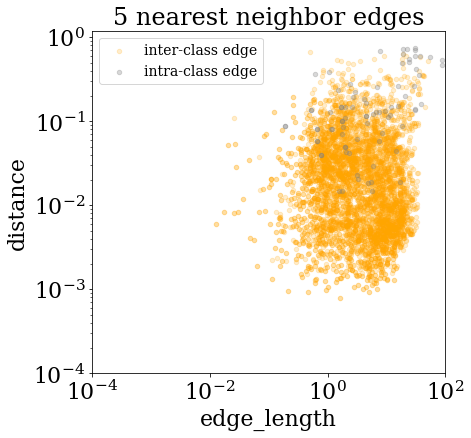

In [96]:
lut = {'inter_class':'orange','intra_class':'gray'}
cols = pairdf['edge_type'].map(lut)
f,ax = plt.subplots()
pairdf[pairdf['edge_type'].str.contains('inter')].plot.scatter('edge_length','distance',alpha=.2,figsize=(7,7),color='orange',label='inter-class edge',ax=ax)
pairdf[pairdf['edge_type'].str.contains('intra')].plot.scatter('edge_length','distance',alpha=.3,figsize=(7,7),color='gray',label='intra-class edge',ax=ax)
plt.yscale('log');plt.xscale('log')
plt.ylim(.0001,1.2)
plt.xlim(.0001,100)
plt.title('5 nearest neighbor edges')
plt.gcf().subplots_adjust(left=0.2,bottom=.2)
f.savefig(savedir+date+'/dist_edgelength.png')
f.savefig(savedir+date+'/dist_edgelength.pdf')

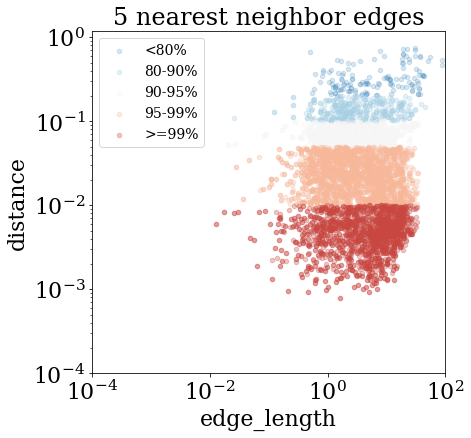

In [97]:
#lut = {'inter_class':'orange','intra_class':'gray'}
#cols = pairdf['edge_type'].map(lut)
colors = sns.color_palette('RdBu_r',5)
f,ax = plt.subplots()
pairdf[pairdf['correlation']<.8].plot.scatter('edge_length','distance',alpha=.2,figsize=(7,7),color=colors[0],label='<80%',ax=ax)
pairdf[(pairdf['correlation']<.9)&(pairdf['correlation']>=.8)].plot.scatter('edge_length','distance',alpha=.3,figsize=(7,7),color=colors[1],label='80-90%',ax=ax)
pairdf[(pairdf['correlation']<.95)&(pairdf['correlation']>=.9)].plot.scatter('edge_length','distance',alpha=.3,figsize=(7,7),color=colors[2],label='90-95%',ax=ax)
pairdf[(pairdf['correlation']<.99)&(pairdf['correlation']>=.95)].plot.scatter('edge_length','distance',alpha=.3,figsize=(7,7),color=colors[3],label='95-99%',ax=ax)
pairdf[pairdf['correlation']>=.99].plot.scatter('edge_length','distance',alpha=.3,figsize=(7,7),color=colors[4],label='>=99%',ax=ax)
plt.yscale('log');plt.xscale('log')
plt.ylim(.0001,1.2)
plt.xlim(.0001,100)
plt.title('5 nearest neighbor edges')
plt.gcf().subplots_adjust(left=0.2,bottom=.2)
f.savefig(savedir+date+'/dist_edgelength_corrcol.png')
f.savefig(savedir+date+'/dist_edgelength_corrcol.pdf')

# plot edges colored by correlation

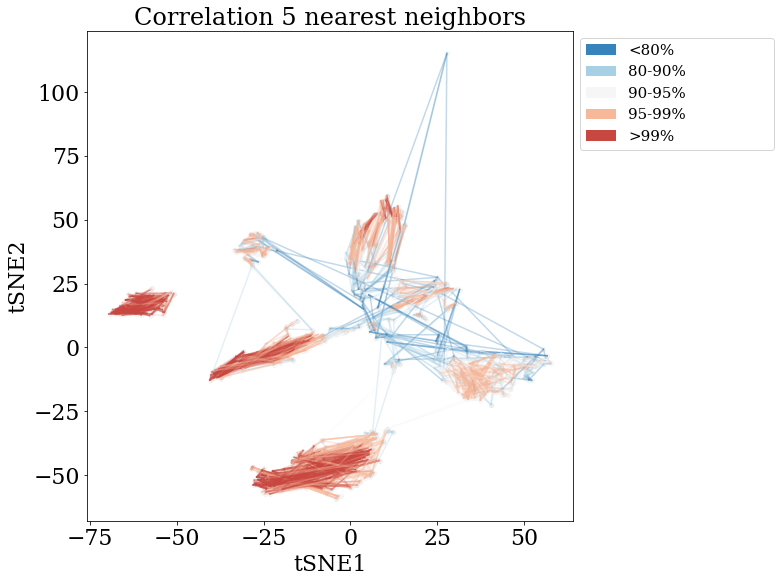

In [98]:
#pairs_wSE_95 = li.make_pairs(pd.DataFrame(wdmSE),.05,5)
colors = sns.color_palette('RdBu_r',5)
f,ax = plt.subplots(figsize=(10,10))
tsnedf.plot.scatter('wDim1','wDim2',figsize=(10,10),ax=ax,alpha=.05,color='gray')
for pair in pairdf.index:
    xy1 = tsnedfSE.iloc[pairdf.loc[pair,0]][['wDim1','wDim2']]
    xy2 = tsnedfSE.iloc[pairdf.loc[pair,1]][['wDim1','wDim2']]
    corr = pairdf.loc[pair,'correlation']
    if corr<.8:
        ax.plot([xy1[0],xy2[0]],[xy1[1],xy2[1]],alpha=.3
            ,c=colors[0])
    elif (corr>=.8) & (corr<.9):
        ax.plot([xy1[0],xy2[0]],[xy1[1],xy2[1]],alpha=.3
            ,c=colors[1])
    elif (corr>=.9) & (corr<.95):
        ax.plot([xy1[0],xy2[0]],[xy1[1],xy2[1]],alpha=.3
            ,c=colors[2])
    elif (corr>=.95) & (corr<.99):
        ax.plot([xy1[0],xy2[0]],[xy1[1],xy2[1]],alpha=.3
            ,c=colors[3])
    elif corr>=.99:
        ax.plot([xy1[0],xy2[0]],[xy1[1],xy2[1]],alpha=.3
            ,c=colors[4])
#
#plt.yticks([]);plt.xticks([])
handles = ['<80%','80-90%','90-95%','95-99%','>99%']
labs = [f for f in colors]
dictcorr = dict(zip(handles,labs))
for x,y in dictcorr.items():
    plt.bar(0,0,color=y,label=x,alpha=1)
    handle, labels = ax.get_legend_handles_labels()
    

plt.xlabel('tSNE1'),plt.ylabel('tSNE2')
plt.title('Correlation 5 nearest neighbors')
plt.legend(handle,handles, bbox_to_anchor=(1, .9, .43, .102), loc=2,
               ncol=1, mode="expand",fontsize=15)
plt.gcf().subplots_adjust(right=0.8,bottom=.2)
plt.show()
f.savefig(savedir+date+'/brain_edges_corr_tsne'+date+'.png')
f.savefig(savedir+date+'/brain_edges_corr_tsne'+date+'.pdf')

# Sankey diagram plotting

In [99]:
keys = ['left_column', 'right_column','figure_name','savedir','close_plot']
valu = ['original_membership','new_membership','pancreas_selfEgdes_'+date
        ,savedir+date+'/',True]
kw = dict(zip(keys,valu))
sank.sankey_BB(ts[6:],**kw)

In [100]:
keys = ['left_column', 'right_column','figure_name','savedir','close_plot']
valu = ['original_membership','new_membership','pancreas_NOselfEgdes_'+date
        ,savedir+date+'/',True]
kw = dict(zip(keys,valu))
sank.sankey_BB(tsnedf[6:],**kw)

# Dot plot creation

In [203]:
keys = ['left_column', 'right_column','figure_name','savedir','close_plot']
valu = ['original_membership','new_membership','pancreas_SelfEgdes_top5'
        ,savedir+date+'/',True]
kw = dict(zip(keys,valu))
genePanelSE,roSE,coSE,genes_OD5,avg3 = sdot.make_dotplot(matrix_feature_selected,ts,5,**kw)

keys = ['left_column', 'right_column','figure_name','savedir','close_plot']
valu = ['original_membership','new_membership','pancreas_SelfEgdes_top10'
        ,savedir+date+'/',True]
kw = dict(zip(keys,valu))
genePanelSE1,roSE,coSE,genes_OD10,avg3 = sdot.make_dotplot(matrix_feature_selected,ts,10,**kw)

keys = ['left_column', 'right_column','figure_name','savedir','close_plot']
valu = ['original_membership','new_membership','pancreas_SelfEgdes_top15'
        ,savedir+date+'/',True]
kw = dict(zip(keys,valu))
genePanelSE,roSE,coSE,genes_OD15,avg3 = sdot.make_dotplot(matrix_feature_selected,ts,15,**kw)

keys = ['left_column', 'right_column','figure_name','savedir','close_plot']
valu = ['original_membership','new_membership','pancreas_SelfEgdes_top20'
        ,savedir+date+'/',True]
kw = dict(zip(keys,valu))
genePanelSE,roSE,coSE,genes_OD20,avg3 = sdot.make_dotplot(matrix_feature_selected,ts,20,**kw)

/home/bojk/Data/minimeta_pyfiles/semiAnnotate_dotplot.py:163: RuntimeWarning: divide by zero encountered in log2
  i+=1
/home/bojk/miniconda3/envs/py360/lib/python3.6/site-packages/matplotlib/collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


In [204]:
imp.reload(sdot)
keys = ['left_column', 'right_column','figure_name','savedir','close_plot']
valu = ['original_membership','new_membership','pancreas_SelfEgdes_top3'
        ,savedir+date+'/',True]
kw = dict(zip(keys,valu))
genePanelSE,roSE,coSE,genes_OD5,avg3 = sdot.make_dotplot(matrix_feature_selected,tsnedfSE,3,**kw)
keys = ['left_column', 'right_column','figure_name','savedir','close_plot']
valu = ['original_membership','new_membership','pancreas_NoSelfEgdes_top3'
        ,savedir+date+'/',True]
kw = dict(zip(keys,valu))
genePanelSE,roSE,coSE,genes_OD5,avg3 = sdot.make_dotplot(matrix_feature_selected,tsnedf,3,**kw)
keys = ['left_column', 'right_column','figure_name','savedir','close_plot']
valu = ['original_membership','new_membership','pancreas_NoSelfEgdes_top5'
        ,savedir+date+'/',True]
kw = dict(zip(keys,valu))
genePanelSE,roSE,coSE,genes_OD5,avg5 = sdot.make_dotplot(matrix_feature_selected,tsnedf,5,**kw)

In [205]:
keys = ['left_column', 'right_column','figure_name','savedir','close_plot']
valu = ['original_membership','new_membership','pancreas_SelfEgdesSE_top5'
        ,savedir+date+'/',True]
kw = dict(zip(keys,valu))
genePanelSE,roSE,coSE,genes_OD5,avg3 = sdot.make_dotplot(matrix_feature_selected,tsnedfSE,5,**kw)

keys = ['left_column', 'right_column','figure_name','savedir','close_plot']
valu = ['original_membership','new_membership','pancreas_SelfEgdesSE_top10'
        ,savedir+date+'/',True]
kw = dict(zip(keys,valu))
genePanelSE1,roSE,coSE,genes_OD10,avg3 = sdot.make_dotplot(matrix_feature_selected,tsnedfSE,10,**kw)


In [114]:
from scipy.spatial.distance import squareform
cols = genes_OD5.columns.sort_values()
index = genes_OD5[cols[0]]
for celltype in cols[1:]:
    index = index.append(genes_OD5[celltype]).reset_index(drop=True)

In [131]:
genePanelSE.loc['INS']

acinar             8.192112
alpha          90732.283259
beta           46912.855948
delta           2023.703138
ductal             9.315457
mesenchymal        0.343458
newClass4          0.007200
newClass2          0.011549
newClass5          0.000000
newClass3          0.065038
newClass1          0.030821
Name: INS, dtype: float64

In [122]:
imp.reload(sdot)
alpha = ['GCG','LOXL4','PLCE1','IRX2','GC','KLHL41','CRYBA2','TM4SF4','RGS4']
beta = ['INS','IAPP','MAFA','NPTX2','DLK1','ADCYAP1','PFKFB2','PDX1','TGFBR3','SYT13']
delta = ['SST','PRG4','LEPR','RBP4','BCHE','HHEX','FRZB','PCSK1','RGS2','GABRG2']
KOLS = ['alpha','beta','delta']
a,b,c,avg_exp_matrix = sdot.make_top_genes(matrix_feature_selected,tsnedf,'new_membership',5)

In [113]:
genes_OD5

,acinar,alpha,beta,delta,ductal,mesenchymal,newClass4,newClass2,newClass5,newClass3,newClass1
0,REG3G,CRHBP,HHATL,CD19,TDRD5,ACTG2,CXCL1,PCK1,COL1A1,SPRR3,VSTM2A
1,PNLIPRP1,GCG,ERCC-00041,MIR3939,APCS,CCL26,SPRR2A,APOA4,MMP11,LYPD2,AGT
2,CTRB2,INS,GHRL,SAGE1,CFTR,APOD,CCL7,GPR173,COL1A2,SERPINB3,APOH


In [125]:
avg_exp_matrix.loc[alpha+beta+delta]

/home/bojk/miniconda3/envs/py360/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


,acinar,alpha,beta,delta,ductal,mesenchymal,newClass2,newClass4,newClass3,newClass1
GCG,3.894170,28487.404475,811.057885,466.278981,0.020920,0.046370,16.015539,0.000000,0.005150,1513.794318
LOXL4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PLCE1,5.332636,100.405375,3.355213,15.334253,6.630977,36.155275,88.543100,8.934962,2.169097,61.208647
IRX2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GC,6.784277,516.490781,18.888567,5.558181,106.229539,39.596067,2187.162268,0.000000,0.025885,55.451439
KLHL41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CRYBA2,1.865983,2438.855742,119.740539,45.900630,0.000029,2.630214,298.805326,0.000000,0.000000,2816.544109
TM4SF4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RGS4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
INS,8.192112,4323.483742,238296.063472,1985.520060,0.105471,0.334299,0.011994,0.000000,0.064717,0.030821


In [126]:
a,b,c,avg_exp_matrix_all = sdot.make_top_genes(matrix,tsnedf,'new_membership',5)
avg_exp_matrix_all.loc[alpha+beta+delta]

/home/bojk/miniconda3/envs/py360/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


,acinar,alpha,beta,delta,ductal,mesenchymal,newClass2,newClass4,newClass3,newClass1
GCG,3.894170,28487.404475,811.057885,466.278981,0.020920,0.046370,16.015539,0.000000,0.005150,1513.794318
LOXL4,1.170966,540.434491,11.187412,6.103459,3.313677,9.560902,59.578425,0.000000,32.472861,688.994200
PLCE1,5.332636,100.405375,3.355213,15.334253,6.630977,36.155275,88.543100,8.934962,2.169097,61.208647
IRX2,0.004936,57.806446,1.231836,4.440231,0.000000,0.333912,254.985044,0.047719,0.478293,147.667687
GC,6.784277,516.490781,18.888567,5.558181,106.229539,39.596067,2187.162268,0.000000,0.025885,55.451439
KLHL41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CRYBA2,1.865983,2438.855742,119.740539,45.900630,0.000029,2.630214,298.805326,0.000000,0.000000,2816.544109
TM4SF4,3.550913,316.064122,48.410515,28.982366,187.834075,29.107239,1771.919715,0.000000,339.923690,1631.987628
RGS4,0.031201,189.169921,17.319124,29.269286,0.756435,2.600732,40.005521,147.206596,0.731614,112.950060
INS,8.192112,4323.483742,238296.063472,1985.520060,0.105471,0.334299,0.011994,0.000000,0.064717,0.030821


In [128]:
a

,acinar,alpha,beta,delta,ductal,mesenchymal,newClass2,newClass4,newClass3,newClass1
GNAS,128.662219,6518.655408,4810.511442,474.721032,418.340057,597.666496,7002.491061,447.384590,458.909051,6534.541804
ERCC-00130,53734.368911,27324.663622,55242.736226,93191.359645,7565.240773,11267.242279,6689.131433,16180.857257,18716.887922,1637.039853
ACTB,1346.655388,3552.600896,1592.774064,1018.610429,3964.364053,9217.479366,2343.574550,9290.465695,5669.638963,3326.246228
SAT1,1118.120617,240.000720,45.516391,832.459550,10405.082376,1380.805626,343.326435,676.717587,2958.434926,747.206068
TTR,2.100595,78566.947232,12286.756329,1650.096454,13.256101,73.618144,15136.936324,0.582670,0.387438,62031.573616
SPARC,0.029217,0.867008,0.005812,27.668551,0.003431,3712.265095,25.225577,20866.065608,1.606636,2.744488
PRSS1,57420.595932,11.431160,14.715065,20.927619,243.265854,1.845099,18.831555,0.000000,20.669674,0.173002
COL3A1,0.053798,0.008371,0.181984,34.237168,0.056519,2699.886228,50.311977,31053.525731,0.810035,1.927932
TACSTD2,580.226256,1.590663,0.109450,61.475888,7834.202825,115.325914,5.075891,0.000000,673.118668,0.000000
CHGB,0.349121,5026.207852,644.458360,185.359533,1.754973,84.044107,6910.387567,0.000000,0.207211,9299.214918


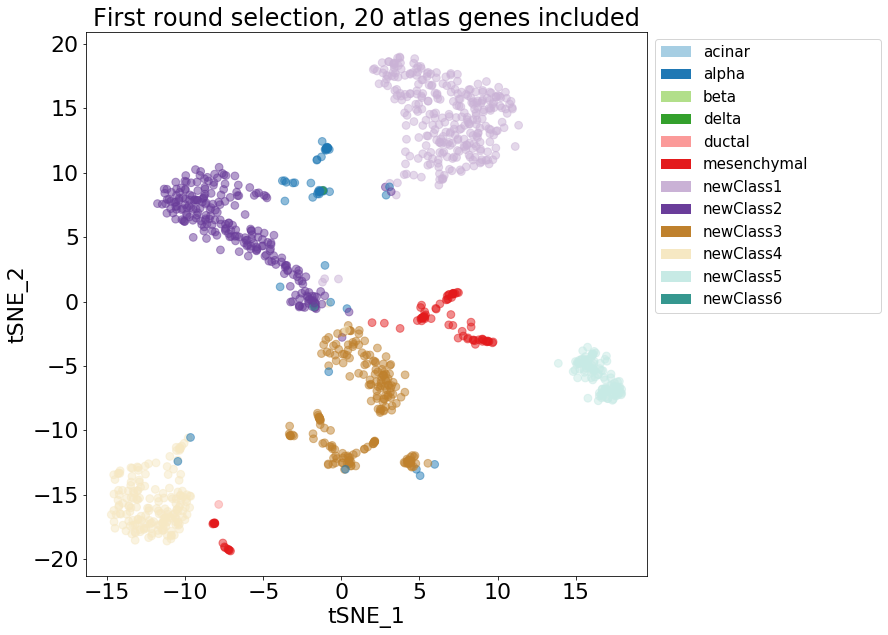

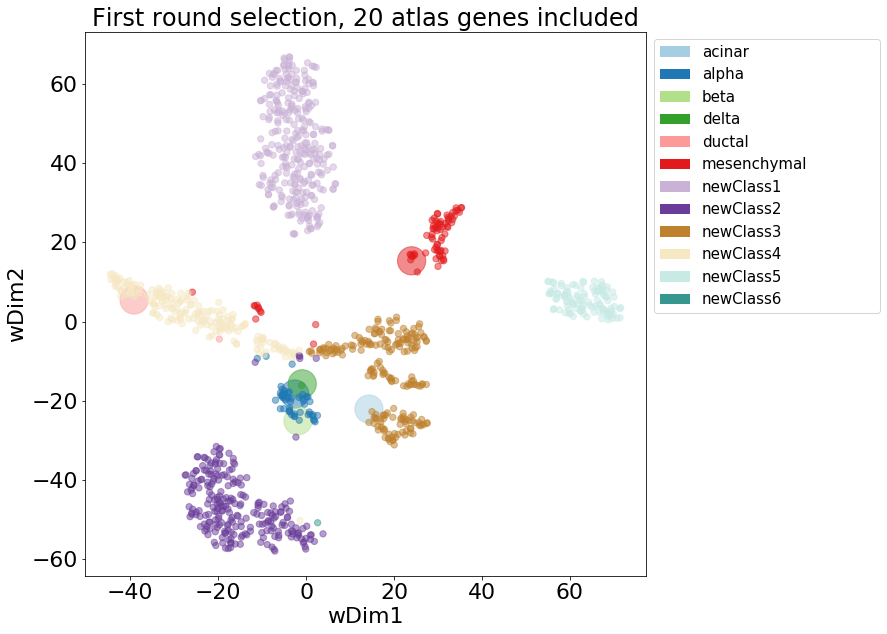

In [28]:
#idx = tsnedf[6:].index
#$TuPa_meta.loc[idx,'new_membership'] = tsnedf.iloc[6:]['new_membership']
# new results mapped onto old tSNE
newlut = dict(zip(vals,sns.color_palette('Paired', 10)[:6]+sns.color_palette('Paired', 10)[8:10]+sns.color_palette('BrBG',len(vals)-8)))
newcolor = TuPa_meta['new_membership'].map(newlut)

f,ax = plt.subplots(figsize=(12,10))
TuPa_meta.plot.scatter('tSNE_1','tSNE_2',s=60
                    ,alpha=.5,color=newcolor,ax=ax)
for x,y in newlut.items():
    plt.bar(0,0,color=y,label=x,alpha=1)
    handles, labels = ax.get_legend_handles_labels()
    #plt.legend(handles[:],labels[:],bbox_to_anchor=(-0.0, 1.08, 1., .102), loc=2,
plt.legend(handles,labels,bbox_to_anchor=(1, .9, .43, .102), loc=2,
               ncol=1, mode="expand",fontsize=15)
plt.title('First round selection, '+str(atlasgenes)+' atlas genes included')
plt.gcf().subplots_adjust(left=.1,right=0.75)


values = sns.color_palette('Paired', 10)[:6]+sns.color_palette('Paired',12)[8:10]+sns.color_palette('BrBG',len(class_numbers)-8)
newlut = dict(zip(class_numbers,values))
newcolor = tsnedf['class'].map(newlut)
f,ax = plt.subplots(figsize=(12,10))
tsnedf.plot.scatter('wDim1','wDim2',s=weights*40
                    ,alpha=.5,color=newcolor,ax=ax)
for x,y in newlut.items():
    plt.bar(0,0,color=y,label=x,alpha=1)
    handles, labels1 = ax.get_legend_handles_labels()
    #plt.legend(handles[:],labels[:],bbox_to_anchor=(-0.0, 1.08, 1., .102), loc=2,
plt.legend(handles,labels,bbox_to_anchor=(1, .9, .43, .102), loc=2,
               ncol=1, mode="expand",fontsize=15)
plt.title('First round selection, '+str(atlasgenes)+' atlas genes included')
plt.gcf().subplots_adjust(left=.1,right=0.75)